In [26]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

from random import randint
from numpy.linalg import inv

# MIDTERM PROJECT ROBT 407

### Done by Nurdaulet Mukhituly and Dasten Turlin
Nurdaulet did 1 and 3, Dasten did 2 and 4, Kaggle problem was solved in collaboration

## 1. Linear Regression
link to the video presentation: https://youtu.be/eLWPICTTMKE

Method of Linear Regression is based on minimization of square root error: 
$\underset{w}{min}\sum\limits_{n=1}^N[y_{n}-(w^{T}x_{n})]^2$

We implemented PLA and linear regression algorithm, as well as their cost functions.

In [17]:
# pocket learning algorithm

#predicting
def pla(w, x1, x2):
    y = w[0] + w[1] * x1 + w[2] * x2
    if y < 0:
        return -1
    else:
        return 1
    
def sign(num):
    if num >= 0:
        return 1
    else:
        return -1

#pocket-pla function itself
def fit_pocketpla_function(X, Y):
    w = [0, 0, 0] 
    w_pocket = [0, 0, 0]
    pocket_errors = len(X) # some large number
    iterations = 0
    while iterations < len(X)/10:
        errors = 0
        count = 0
        while count != len(X):
            predict = pla(w, X[count][1], X[count][2])
            if sign(Y[count]) != predict:
                errors += 1
                w[0]+= sign(Y[count])
                w[1] += sign(Y[count]) * X[count][1]
                w[2] += sign(Y[count]) * X[count][2]
            count += 1
        if pocket_errors > errors:
            w_pocket[0] = w[0]
            w_pocket[1] = w[1]
            w_pocket[2] = w[2]
            pocket_errors = errors
        iterations += 1
    return w_pocket

In [18]:
#linear regression
def linear_regression(X, Y):
    x_crest = np.dot(inv(np.dot(X.T, X)), X.T)
    coefficient = np.dot(x_crest, Y)
    return coefficient

## Generating DataSet

In [19]:
def generate(size, dim):
    X = np.random.rand(size, dim)
    W = np.array([0.3, 0.9, -1.9]) # real weights
    X[:, 0] = np.ones(size)
    Y = np.dot(X, W) # adding linearity
    Y = Y.reshape(X.shape[0], 1)
    return X, Y

# adding noise as required by the exercise
def add_noise(noise, data):
    new_data = data
    if noise <= 1:
        temp = 0
        max_value = noise * len(new_data)
        while temp < max_value:
            randval = np.random.randint(0, len(new_data))
            randval %= len(data) # to make sure :)
            new_data[randval] *= -1
            temp += 1
    else:
        print("invalid noise value. should be < 1")
    return new_data

In [20]:
# plotting points
def plot_graph(X_any, Y_any):
    i = 0
    while i != len(X_any):
        if (Y_any[i] > 0):
            plt.scatter(X_any[i, 1], X_any[i,2], color = 'b')
        else:
            plt.scatter(X_any[i, 1], X_any[i,2], color = 'r')
        i += 1

In [21]:
# plotting function (either pla or linear regression)
def plot_function(X, W):  
        plt.plot(X[:, 1],-(W[0] + X[:,1]*W[1])/W[2], color = "black", label = "your function")

In [22]:
X_new, Y_new = generate(1000, 3)
Y_new = add_noise(0.1, Y_new)

In [23]:
W_pocket = fit_pocketpla_function(X_new[0:300], Y_new[0:300]) #splitting train and test data

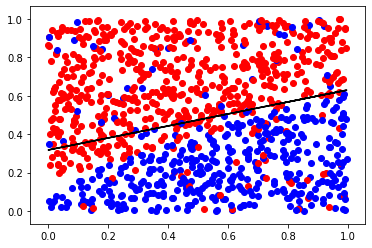

In [27]:
plot_graph(X_new, Y_new)
plot_function(X_new, W_pocket)

In [28]:
W_linear = linear_regression(X_new[0:300], Y_new[0:300])

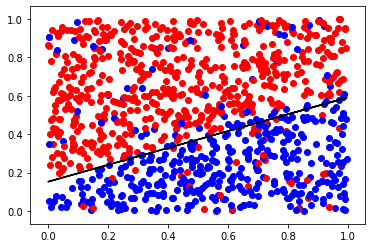

In [29]:
plot_graph(X_new, Y_new)
plot_function(X_new, W_linear)

In [30]:
#calculating error of each function
def e_test(X, Y, W):
    errors = 0
    count = 0
    while count != len(X):
        predict = pla(W, X[count][1], X[count][2])
        if sign(Y[count]) != predict:
            errors += 1
        count += 1
    return errors/len(X) 

In [31]:
e_pocket = e_test(X_new, Y_new, W_pocket)
e_linear = e_test(X_new, Y_new, W_linear)
print(e_pocket)
print(e_linear)

0.148
0.106


In [32]:
# I found how to do versus graphs in MIT's collab
def test():
    e_pocket_history = []
    e_linear_history = []
    count = 0
    while count != 100:
        X_new, Y_new = generate(1000, 3)
        Y_new = add_noise(0.1, Y_new)
        W_pocket = fit_pocketpla_function(X_new[0:300], Y_new[0:300])
        W_linear = linear_regression(X_new[0:300], Y_new[0:300])
        e_pocket = e_test(X_new, Y_new, W_pocket)
        e_linear = e_test(X_new, Y_new, W_linear)
        e_pocket_history.append(e_pocket)
        e_linear_history.append(e_linear)
        count += 1
    plt.plot(e_pocket_history)
    plt.plot(e_linear_history)
    plt.legend(('e_pocket', 'e_linear'))
    plt.xlabel('Iterations')
    plt.ylabel('E_test value')

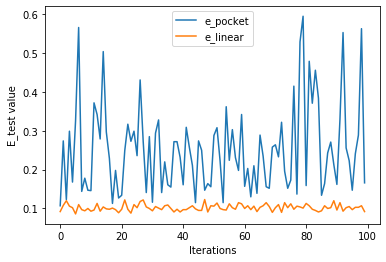

In [34]:
test()

## Conclusion for Task 1

Our experiment clearly shows that the pocket algorithm is less useful than linear due to the following reasons:
1. It makes a lot of iterations
2. In the graph it shows that it performed worse in EVERY experiment
3. Pocket algorithm can be very unstable.

Theoretically, we could do a laaaaarge-number of iterations, but we are limited by our CPU and GPU.

According to the reasons above, linear regression is better in the given situation.

## 2. Logistic Regression and Stochastic Gradient Descent

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Some data preprocessing - from DataFrame to NumPy array with a column of ones in the beginnging

In [36]:


features = iris.columns[0:4]
X = iris[features].to_numpy()


from sklearn.preprocessing import LabelBinarizer
species = LabelBinarizer()
Y = species.fit_transform(iris.species.values)


from sklearn.model_selection import train_test_split
X_tr, X_te, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

y_test

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [91]:
# Now, we are going to append column of ones to X_train and X_test, 
# as well as change all zeros in y_train and y_test to -1 to achieve negative weight updates
b = np.ones((X_te.shape[0], 1))
X_test = np.append(b, X_te, axis=1 )

b = np.ones((X_tr.shape[0], 1))
X_train = np.append(b, X_tr, axis=1 )

for i in range(y_train.shape[0]):
    for j in range (3):
        if(y_train[i][j] == 0):
            y_train[i][j] = -1

for i in range(y_test.shape[0]):
    for j in range (3):
        if(y_test[i][j] == 0):
            y_test[i][j] = -1
y_test

array([[-1, -1,  1],
       [-1,  1, -1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1,  1, -1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [ 1, -1, -1],
       [ 1, -1, -1],
       [-1,  1, -1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1,  1, -1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1],
       [-1,  1, -1],
       [-1,  1, -1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1]])

## Now, the SGD itself:

In [103]:
def stochastic_gradient_descent (X_train, X_test, y_train, y_test, iterations, learning_rate, type):
    E_in = []
    E_out = []
    E_in_average = []
    E_out_average = []
    instances, features = X_train.shape
    weights = np.zeros(features)
    
    
    
    for i in range(iterations):
        
        ind = np.random.randint(instances)
        gradient = (-y_train[ind][type-1] * X_train[ind])/(1+np.exp(y_train[ind][type-1]*2*np.dot(weights.T, X_train[ind])))
        weights[:] = weights - gradient * learning_rate
     
        #here, we calculate average E_in for all instances in X_train
        E = []
        for j in range (len(X_train)):
            err = np.log(1+np.exp(-y_train[j][type-1]*np.dot(weights.T, X_train[j])))
            E.append(err)
        E_in_average.append(np.average(E))
        
        #here, we calculate average E_out for all instances in X_test
        E_out_total = 0
        for j in range(len(X_test)):
            cross_entropy_error_out = np.log(1+np.exp(-y_test[j][type-1]*2*np.dot(weights.T, X_test[j])))
            E_out_total += cross_entropy_error_out
        E_out_average.append(E_out_total / X_test.shape[0])
        
        #E_out_average.append(np.average(E_out))
        
    return weights, E_in_average, E_out_average

## Now, we implement One-versus-all approach:

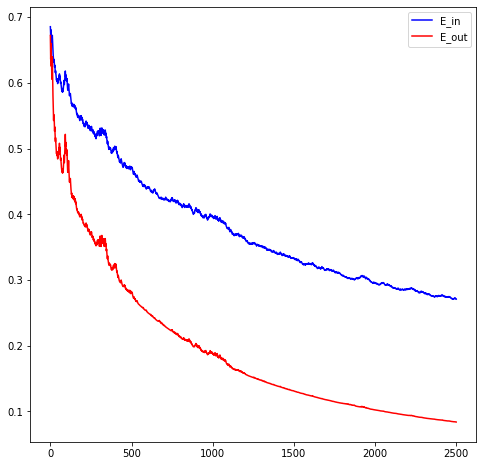

In [99]:
#1st type vs All
weights, E_in_average, E_out_average = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 2500, 0.001, 1)
fig = plt.figure(figsize=(8,8))
plt.plot(range(2500), E_in_average, 'b', label='E_in')
plt.plot(range(2500), E_out_average, 'r', label='E_out')
plt.legend()

E_out converges well

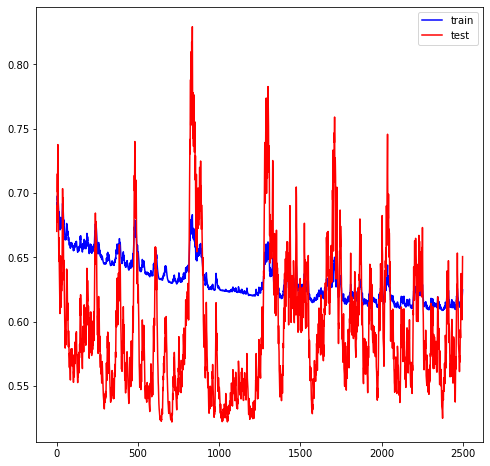

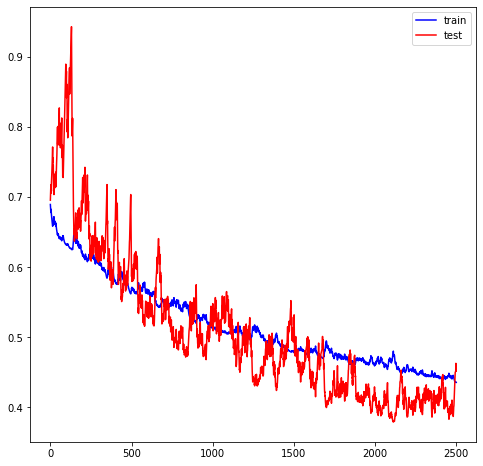

In [100]:
#2nd type vs All
weights, E_in_average, E_out_average = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 2500, 0.001, 2)

fig = plt.figure(figsize=(8,8))
plt.plot(range(2500), E_in_average, 'b', label='train')
plt.plot(range(2500), E_out_average, 'r', label='test')
plt.legend()


#3rd type vs All
weights, E_in_average, E_out_average = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 2500, 0.001, 3)

fig = plt.figure(figsize=(8,8))
plt.plot(range(2500), E_in_average, 'b', label='train')
plt.plot(range(2500), E_out_average, 'r', label='test')
plt.legend()

## Now, we are to calculate actual accuracy of our model, i.e. E(g = w.T*X_test)

In [104]:

w1 = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 5000, 0.001,1)[0]
w2 = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 5000, 0.001,2)[0]
w3 = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 5000, 0.001,3)[0]

count = 0
for i in range(len(X_test)):
    g1 = np.dot(w1.T, X_test[i])
    g2 = np.dot(w2.T, X_test[i])
    g3 = np.dot(w3.T, X_test[i])
    if(g1<g2):
        if(g2<g3):
            flag = 3
        else:
            flag = 2
    else:
        if(g1<g3):
            flag = 3
        else:
            flag = 1
    for j in range(3):
        if(y_test[i][j] == 1):
            output = j+1
    if(flag == output):
        count+=1
    print(g1, g2, g3, "Model prediction:", '\n', flag, "Actual value:", output, sep = ' ')
print("Accuracy:", count/len(X_test)*100, "%", sep = ' ')  

-3.139197139208979 0.29448681185088116 0.6636809991711239 Model prediction: 
 3 Actual value: 3
-0.9415820850377212 -0.12384216021868688 -0.46058507122610415 Model prediction: 
 2 Actual value: 2
-2.3311808625505943 0.2634899684040428 0.36848167883223515 Model prediction: 
 3 Actual value: 3
-2.5062907028469317 0.12355658100272333 0.47990384938859165 Model prediction: 
 3 Actual value: 3
-1.3661832599979415 -0.16433246276381566 -0.31651754847440494 Model prediction: 
 2 Actual value: 2
-2.4395636502981004 -0.001435531399251247 0.37700776276087034 Model prediction: 
 3 Actual value: 3
1.1690781073529366 -0.7533132412976862 -2.199138100512964 Model prediction: 
 1 Actual value: 1
1.1468730170349248 -0.7916235765277972 -2.037622149474911 Model prediction: 
 1 Actual value: 1
0.9485475491543451 -0.6770947393300585 -1.9327734159318606 Model prediction: 
 1 Actual value: 1
-1.6528537082862922 -0.12359215181306227 0.029762015024956234 Model prediction: 
 3 Actual value: 2
0.6836690795406509 -

## Conclusion for task 2

Despite unstable E_test for stochastic gradient descent, we have received very high overall accuracy, i.e. E(g). However, such accuracy hints that logistic regression might be prone to overfitting; moreover, thousands of iterations require tons of computations, thus making the calculation time much slower.

## 3. Support-Vector-Machines
Link to the video presentation https://youtu.be/oJDqjSwa8HM

In [42]:
iris = iris[:100]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [43]:
Y = iris.species
Y = Y[0:100]
count = 0
while count != len(Y):
    if Y[count] == 'setosa':
        Y[count] = 1
    else:
        Y[count] = -1
    count += 1

In [44]:
X = iris.drop('species', axis = 1)
X = X[0:100]

In [45]:
X2 = X.drop('petal_length', axis = 1)
X2 = X2.drop('petal_width', axis = 1)

In [46]:
X = X.to_numpy()
Y = Y.to_numpy()
X2 = X2.to_numpy()
Y = Y.astype(np.double)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 44)

### Thus, we take iris[0:100]
### Now, we move to Primal SVM

In [48]:
import cvxopt
import matplotlib.pyplot as plt

### cvxopt.solvers.qp(P, q, G, h, A, b)
this is given by documentation. We will initialise these objects to further calculate

In [49]:
def svm_function(X, Y):
    
    n = X.shape[0]
    d = X.shape[1]

    P = np.zeros((d + 1, d + 1))
    P[1:, 1:] = np.eye(d)
    P_cvxopt = cvxopt.matrix(P)
    
    q_temp = np.zeros(d + 1)
    q = cvxopt.matrix(q_temp)
    
    new_y = np.reshape(Y, (-1, 1))
    temp_matrix = -np.insert(X, 0, np.ones(n), axis = 1) * new_y
    G_cvxopt = cvxopt.matrix(temp_matrix)
    
    h_temp = -np.ones(n)
    h = cvxopt.matrix(h_temp)
    
    calculate = cvxopt.solvers.qp(P_cvxopt, q, G_cvxopt, h)
    
    return calculate

In [50]:
solution = svm_function(X_train, Y_train)

     pcost       dcost       gap    pres   dres
 0:  1.1477e+00  3.5176e+01  2e+02  2e+00  5e+01
 1:  7.3095e+00 -1.9702e+01  8e+01  8e-01  2e+01
 2:  1.9093e+01 -1.0546e+01  7e+01  4e-01  1e+01
 3:  3.1620e+01  1.5828e+01  2e+01  1e-01  3e+00
 4:  3.3561e+01  3.2481e+01  2e+00  7e-03  2e-01
 5:  3.3793e+01  3.3781e+01  2e-02  7e-05  2e-03
 6:  3.3795e+01  3.3795e+01  2e-04  7e-07  2e-05
 7:  3.3795e+01  3.3795e+01  2e-06  7e-09  2e-07
 8:  3.3795e+01  3.3795e+01  2e-08  7e-11  2e-09
Optimal solution found.


In [51]:
b_and_w = np.array(solution['x'])

In [52]:
b = b_and_w[0][0]
w = b_and_w[1:] 

In [53]:
w.shape

(2, 1)

In [54]:
b

17.315789473215457

In [55]:
w

array([[-6.31578947],
       [ 5.26315789]])

In [56]:
def plot_svm_graph(W, X, Y, b):
    i = 0
    while i != len(X):
        if Y[i] > 0:
            plt.scatter(X[i, 0], X[i,1], color = 'b')
        else:
            plt.scatter(X[i, 0], X[i,1], color = 'r')
        i += 1
    x_plot = np.arange(4.5, 6.5, 0.25)
    y_predict = -(b + x_plot*W[0])/W[1]
    distance = 1/np.linalg.norm(W)
    upper_margin = y_predict + distance
    lower_margin = y_predict - distance
    
    plt.plot(x_plot, y_predict)
    plt.plot(x_plot, upper_margin)
    plt.plot(x_plot, lower_margin)
    plt.legend(('predicted', 'upper_margin', 'lower_margin'))
    plt.show()



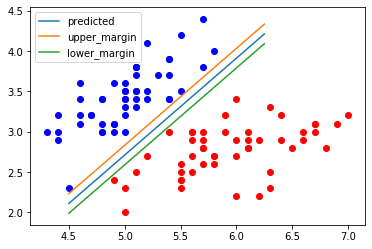

In [57]:
plot_svm_graph(w, X, Y, b)

## We now implemented a prime SVM

We now see that margins touch support-vector, which can show that our SVM was implemented correctly!



## Dual SVM

Link for the video presentation: https://youtu.be/NMNwbPafC5E

In [58]:
def dual_svm_function(X, Y):
    
    n = X.shape[0]
    d = X.shape[1]
    
    new_y = Y.reshape(-1, 1)
    X_star = new_y * X
    
    P = np.dot(X_star, X_star.T)
    P_cvxopt = cvxopt.matrix(P)
    
    q = -np.ones(n)
    q_cvxopt = cvxopt.matrix(q)
    
    G = -np.eye(n)
    G_cvxopt = cvxopt.matrix(G)
    
    h = np.zeros(n)
    h_cvxopt = cvxopt.matrix(h)
    
    new_new_y = new_y.reshape(1, -1)
    A_cvxopt = cvxopt.matrix(new_new_y)
    
    b = np.zeros(1)
    b_cvxopt = cvxopt.matrix(b)
    
    alpha = cvxopt.solvers.qp(P_cvxopt, q_cvxopt, G_cvxopt, h_cvxopt, A_cvxopt, b_cvxopt)
    return alpha



In [59]:
alpha = dual_svm_function(X_train, Y_train)

     pcost       dcost       gap    pres   dres
 0: -1.3152e+01 -2.9334e+01  2e+02  1e+01  2e+00
 1: -2.4030e+01 -3.1555e+01  8e+01  5e+00  8e-01
 2: -4.5492e+01 -4.7648e+01  7e+01  3e+00  4e-01
 3: -3.5515e+01 -3.9020e+01  2e+01  7e-01  1e-01
 4: -3.3809e+01 -3.4043e+01  2e+00  5e-02  7e-03
 5: -3.3795e+01 -3.3798e+01  2e-02  5e-04  7e-05
 6: -3.3795e+01 -3.3795e+01  2e-04  5e-06  7e-07
 7: -3.3795e+01 -3.3795e+01  2e-06  5e-08  7e-09
Optimal solution found.


In [60]:
alpha = np.array(alpha['x'])
alpha = alpha.flatten()
print(alpha)

[-1.37241951e-09 -4.51206777e-10 -1.40261809e-09  1.22792530e-08
  1.03388738e-09  1.52094251e-09  1.94801815e-08  1.24650800e-08
 -1.15166879e-09 -7.85326928e-10 -2.03928588e-09  6.22986671e-11
  4.20643295e-09  2.61646877e-10 -1.02847517e-09  1.03388738e-09
 -1.58991900e-09  6.22986671e-11 -2.81419941e-10 -2.08059060e-09
 -6.86098112e-10 -1.54611472e-09 -2.10648297e-09  2.86549963e-09
  3.05709526e-09 -3.57629990e-10  1.43886968e+01 -8.84547399e-10
  1.84591200e-09  2.55649028e-10  3.05709526e-09  2.38525393e-09
 -1.42754825e-09 -7.62621092e-10 -4.80312991e-10  2.57177933e-09
 -1.08482888e-09  8.68615062e-10 -4.80312991e-10 -6.08074673e-10
 -2.10038047e-09 -1.12331850e-09 -1.96036756e-09  8.91472244e-10
 -3.57629990e-10 -2.04225921e-09  8.87170622e-10 -2.11322629e-09
 -1.17012245e-10  4.80231777e-07 -5.61160216e-10 -1.83313489e-09
  1.94063160e+01 -1.51824396e-09  5.90669439e-09  9.38681203e+00
  1.32827466e-09 -1.40261809e-09 -5.61160216e-10  2.22181571e-10
 -1.88117333e-09  8.17230

In [61]:
w = np.matmul((alpha * Y_train).T, X_train)
w

array([-6.31578945,  5.26315787])

In [64]:
# our support vectors
i = 0
sv_indexes = []
while i != len(alpha):
    if alpha[i] >= 1e-7:
        sv_indexes.append(i)
    i += 1

In [65]:
b = Y_train[sv_indexes[0]] - np.matmul(w.T, X_train[sv_indexes[0]])
b

17.31578942920447

In [66]:
def plot_dual_svm_graph(W, X, Y, b, alpha):
    i = 0
    while i != len(X):
        if Y[i] > 0:
            plt.scatter(X[i, 0], X[i,1], color = 'b')
        else:
            plt.scatter(X[i, 0], X[i,1], color = 'r')
        i += 1
    x_plot = np.arange(4.5, 6.5, 0.25)
    y_predict = -(b + x_plot*W[0])/W[1]
    distance = 1/np.linalg.norm(W)
    upper_margin = y_predict + distance
    lower_margin = y_predict - distance
    
    plt.plot(x_plot, y_predict)
    plt.plot(x_plot, upper_margin)
    plt.plot(x_plot, lower_margin)
    i = 0
    while i != len(X):
        if alpha[i] >= 1e-7:
            plt.scatter(X[i, 0], X[i,1], color = 'y', label = 'support-vectors')
        i += 1
    plt.legend(('predicted', 'upper_margin', 'lower_margin'))
    plt.show()



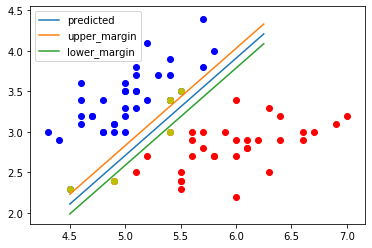

In [67]:
plot_dual_svm_graph(w, X_train, Y_train, b, alpha)

## 4. Practical design of a learning algorithm

In [68]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import random

from sklearn import datasets 
digits = datasets.load_digits()

In [69]:
print(digits.images.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797,)


In [70]:
X = digits.data
y = digits.target
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## Log regression function

In [74]:
def sigmoid(s):
    return np.exp(s)/(1+np.exp(s))
sigmoid (0)


def predict(X, weights):
    s = np.dot(weights.T, X)
    return sigmoid(s) #returns probability!


def stochastic_gradient_descent (X_train, y_train, iterations = 5000, learning_rate = 0.001, type=1):
    E_in = []
    E_out = []
    E_in_average = []
    E_out_average = []
    instances, features = X_train.shape
    weights = np.zeros(features)
    w = []
    
    
    for i in range(iterations):
        #print(weights)
        #print(predict((X_test[0]), weights[1:]))
        
        ind = np.random.randint(instances)
        
       
        gradient = (-y_train[ind][type-1] * X_train[ind])/(1+np.exp(y_train[ind][type-1]*np.dot(weights.T, X_train[ind])))
        
        weights = weights - gradient * learning_rate
        w.append(weights)
        
        E_in.append(np.log(1+np.exp(y_train[ind][type-1]*np.dot(w[-1].T, X_train[ind]))))
        
        E = []
        for j in range (len(X_train)):
            err = np.log(1+np.exp(-y_train[j][type-1]*np.dot(w[-1].T, X_train[j])))
            E.append(err)
        E_in_average.append(np.average(E))
        
        '''
        E_out_total = 0
        for j in range(len(X_test)):
            cross_entropy_error_out = np.log(1+np.exp(-y_test[j][type-1]*2*np.dot(weights.T, X_test[j])))
            E_out_total += cross_entropy_error_out
        E_out.append(E_out_total / X_test.shape[0])
        
        E_out_average.append(np.average(E_out))
        '''
        
        
        
        
    #return weights, E_in, E_in_average, E_out, E_out_average
    return weights, E_in, E_in_average

In [82]:
def logistic_regression (X, y):
    w = []
    E_train = []
    for i in range (10):
        #w.append(stochastic_gradient_descent(X, y, iterations = 5000, learning_rate=0.001, type = i+1)[0])
        E_train.append(stochastic_gradient_descent(X, y, iterations = 1000, learning_rate=0.01, type = i+1)[2][-1])
    return min(E_train)
        

## Linear Regression function

In [83]:
def linear_regression(X, Y):
    x_crest = np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T)
    coefficient = np.dot(x_crest, Y)
    return coefficient

In [84]:
def lin_reg_error(X, Y):
    error = 0
    count = 0
    while count != len(X):
        error += (Y[count] - np.dot(linear_regression(X,Y).T, X[count]))**2
        count = count + 1
    return error

## 10-fold Cross Validation

In [85]:
def fold_split(X, y, folds = 10):
    size = X.shape[1]/folds
    c = list(zip(X, y))
    random.shuffle(c)
    
    X, y = zip(*c)
    X_fold = np.array_split(X, folds)
    y_fold = np.array_split(y, folds)
    return X_fold, y_fold

In [86]:
folds = 10
E = []
E_lin = []
X = digits.data
y = digits.target
for ind in range(folds):
    X_fold = fold_split(X, y, folds)[0][ind]
    y_fold = fold_split(X, y, folds)[1][ind]
    E.append(linear_regression (X_fold, y_fold))
    E_lin.append(lin_reg_error(X_fold, y_fold))

norm = np.linalg.norm(E_lin)
np.average(E_lin/norm)

0.31503287100745536

In [87]:
X = digits.data
y = digits.target

from sklearn.preprocessing import LabelBinarizer
#species = LabelBinarizer()
y = species.fit_transform(y)


for i in range(y.shape[0]):
    for j in range (10):
        if(y[i][j] == 0):
            y[i][j] = -1
y.shape

(1797, 10)

In [89]:
folds = 10
E = []
for ind in range(folds):
    X_fold = fold_split(X, y, folds)[0][ind]
    y_fold = fold_split(X, y, folds)[1][ind]
    E.append(logistic_regression (X_fold, y_fold))


norm = np.linalg.norm(E)
#E = np.average(E/norm)

print(np.average(E/norm))



0.3068044908892965


## 5-fold Cross Validation

In [493]:
folds = 5
E = []
E_lin = []
X = digits.data
y = digits.target
for ind in range(folds):
    X_fold = fold_split(X, y, folds)[0][ind]
    y_fold = fold_split(X, y, folds)[1][ind]
    E.append(linear_regression (X_fold, y_fold))
    E_lin.append(lin_reg_error(X_fold, y_fold))

norm = np.linalg.norm(E_lin)
np.average(E_lin/norm)

0.446792033383392

In [494]:
def lin_reg_error(X, Y):
    error = 0
    count = 0
    while count != len(X):
        error += (Y[count] - np.dot(linear_regression(X,Y).T, X[count]))**2
        count = count + 1
    return error

In [495]:
X = digits.data
y = digits.target

from sklearn.preprocessing import LabelBinarizer
#species = LabelBinarizer()
y = species.fit_transform(y)

y.shape

(1797, 10)

In [496]:
folds = 5
E = []
for ind in range(folds):
    X_fold = fold_split(X, y, folds)[0][ind]
    y_fold = fold_split(X, y, folds)[1][ind]
    E.append(logistic_regression (X_fold, y_fold))

norm = np.linalg.norm(E)
np.average(E/norm)
#print(np.average(E))

0.44720087436204503

## 20-fold Cross Validation

In [285]:
folds = 20
E = []
E_lin = []
X = digits.data
y = digits.target
for ind in range(folds):
    X_fold = fold_split(X, y, folds)[0][ind]
    y_fold = fold_split(X, y, folds)[1][ind]
    E.append(linear_regression (X_fold, y_fold))
    E_lin.append(lin_reg_error(X_fold, y_fold))

norm = np.linalg.norm(E_lin)
np.average(E_lin/norm)

0.2198263757764239

In [451]:
X = digits.data
y = digits.target

from sklearn.preprocessing import LabelBinarizer
#species = LabelBinarizer()
y = species.fit_transform(y)

y.shape

(1797, 10)

In [453]:
folds = 20
E = []
for ind in range(folds):
    X_fold = fold_split(X, y, folds)[0][ind]
    y_fold = fold_split(X, y, folds)[1][ind]
    E.append(logistic_regression (X_fold, y_fold))

norm = np.linalg.norm(E)
np.average(E/norm)
#print(np.average(E))

0.22360679774997902

So here it's clear that the more folds there are, the less the error for both logistic and linear regression